## Filtering

- Load a signal from .dat file
- Apply different filters 
- Plot the resulting filtered signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from lib.signalprocessingmd import fourierTransform,convolution,getScaledDomain
from lib.plotmd import plot2D,plotVector
from lib.filtersmd import lpf,hpf,bpf,bsf
from lib.helpersmd import readFromDat

In [2]:
def plotHelper(xn,Xn,fn,Fn,yn,Yn,dt,filter_name):
    fscaled1=getScaledDomain(dt=dt,N=xn.shape[0])[:Xn.shape[0]]
    fscaled2=getScaledDomain(dt=dt,N=fn.shape[0])[:Fn.shape[0]]
    fscaled3=getScaledDomain(dt=dt,N=yn.shape[0])[:Yn.shape[0]]
    
    plt.figure(figsize=(12, 12), dpi=80)
    plt.subplot(321)
    plotVector(xn,"time domain ","n","f(n)")
    plt.subplot(322)
    plot2D(fscaled1,Xn,"frequency domain","n","F(n)")
    plt.subplot(323)
    plotVector(fn,filter_name+" | time domain ","n","f(n)")
    plt.subplot(324)
    plot2D(fscaled2,Fn,filter_name+" | frequency domain","n","F(n)")
    plt.subplot(325)
    plotVector(yn,"time domain ","n","f(n)")
    plt.subplot(326)
    plot2D(fscaled3,Yn,"frequency domain","n","F(n)")
    plt.tight_layout()
    plt.show()


In [3]:
# control parameters
dt=0.001   # sampling period
#  Input Signal
NS=1000    # number of samples in input signal
fscaledS=getScaledDomain(dt,NS)[:NS/2]  # scaled domain for input signal spectur
# Filters
m=128      # m samples to form the right part of the filter , because the filter is symmetric
NF=2*m+1   # NF is the total size of the filter
fscaledF=getScaledDomain(dt,NF)[:NF/2]  #scaled domain for the filters spectur

<IPython.core.display.Javascript object>


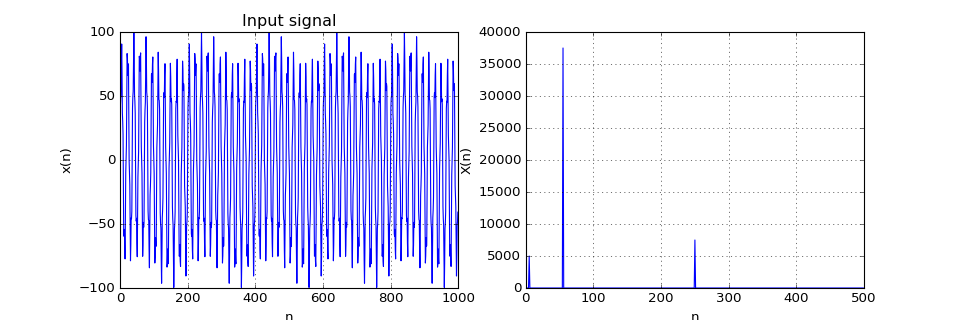

In [4]:
xn=readFromDat('./data/php.dat',np.float32,NS)
NS=xn.shape[0]   # Modify NS in case there is less samples
_,Xn=fourierTransform(xn)[:NS/2]
Xn=Xn[:NS/2]

plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(121)
plotVector(xn,"Input signal","n","x(n)")
plt.subplot(122)
plot2D(fscaledS,Xn,"","n","X(n)")
plt.show()

<IPython.core.display.Javascript object>


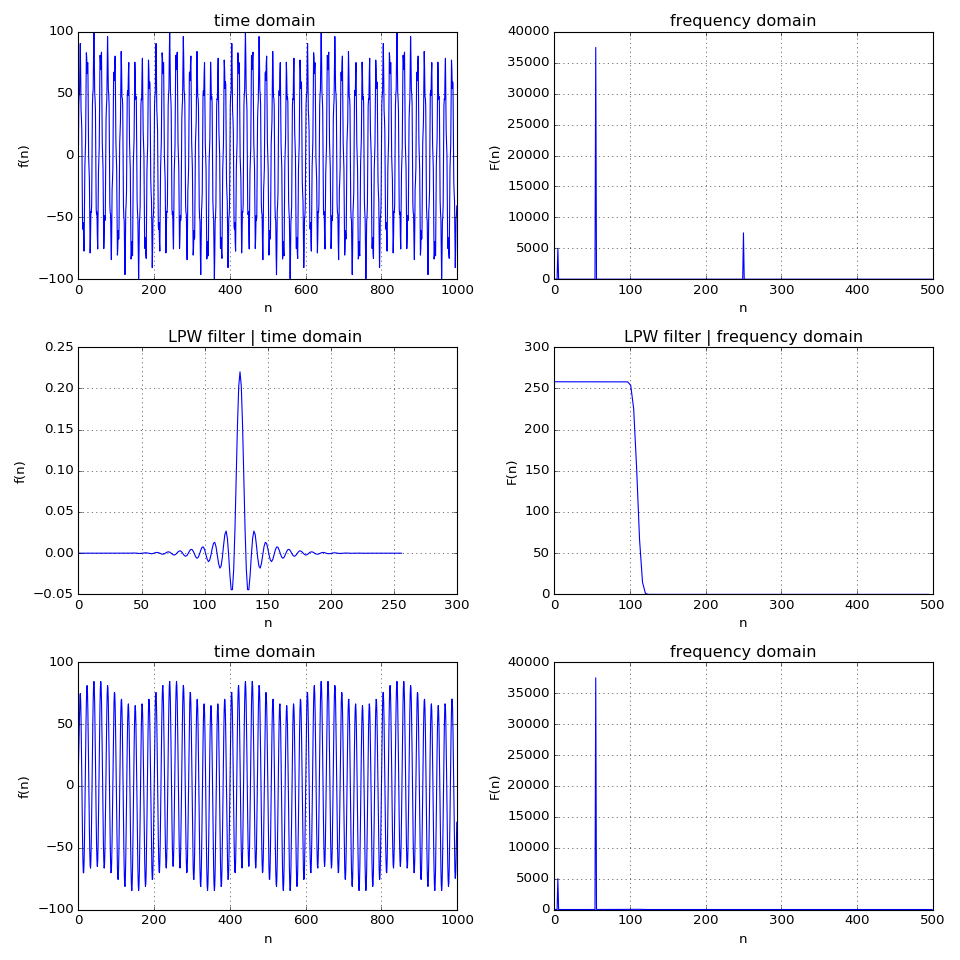

In [5]:
fout=110
lpw=lpf(fout,m,dt)
_,Cn_lpw=fourierTransform(lpw)
Cn_lpw=Cn_lpw[:NF/2]*(NF+1)
yn_lpw=convolution(xn,lpw)[m:-m]
_,Yn_lpw=fourierTransform(yn_lpw)
Yn_lpw=Yn_lpw[:NS/2]
plotHelper(xn,Xn,lpw,Cn_lpw,yn_lpw,Yn_lpw,dt,"LPW filter")

<IPython.core.display.Javascript object>


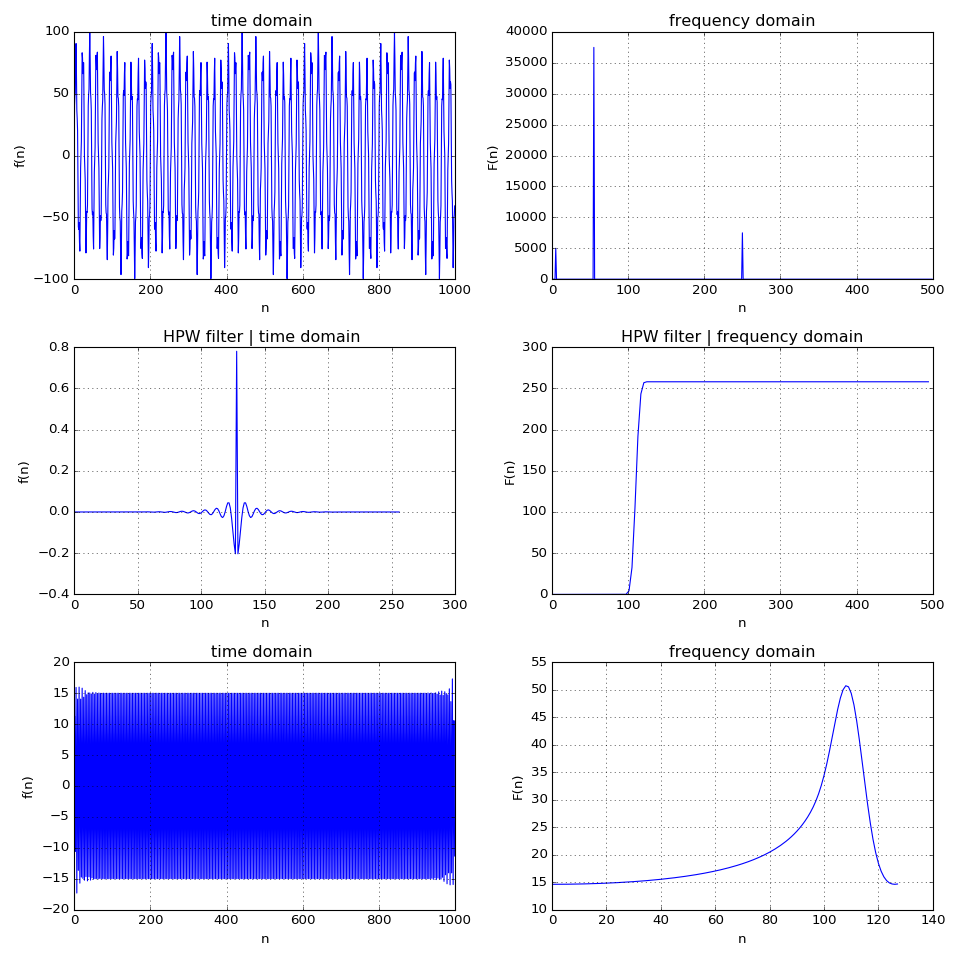

In [6]:
fc=110
hpw=hpf(fc,m,dt)
_,Cn_hpw=fourierTransform(hpw)
Cn_hpw=Cn_hpw[:NF/2]*(NF+1)

yn_hpw=convolution(xn,hpw)[m:-m]
_,Yn_hpw=fourierTransform(yn_hpw)
Yn_hpw=Yn_hpw[:NF/2]
plotHelper(xn,Xn,hpw,Cn_hpw,yn_hpw,Yn_hpw,dt,"HPW filter")

<IPython.core.display.Javascript object>


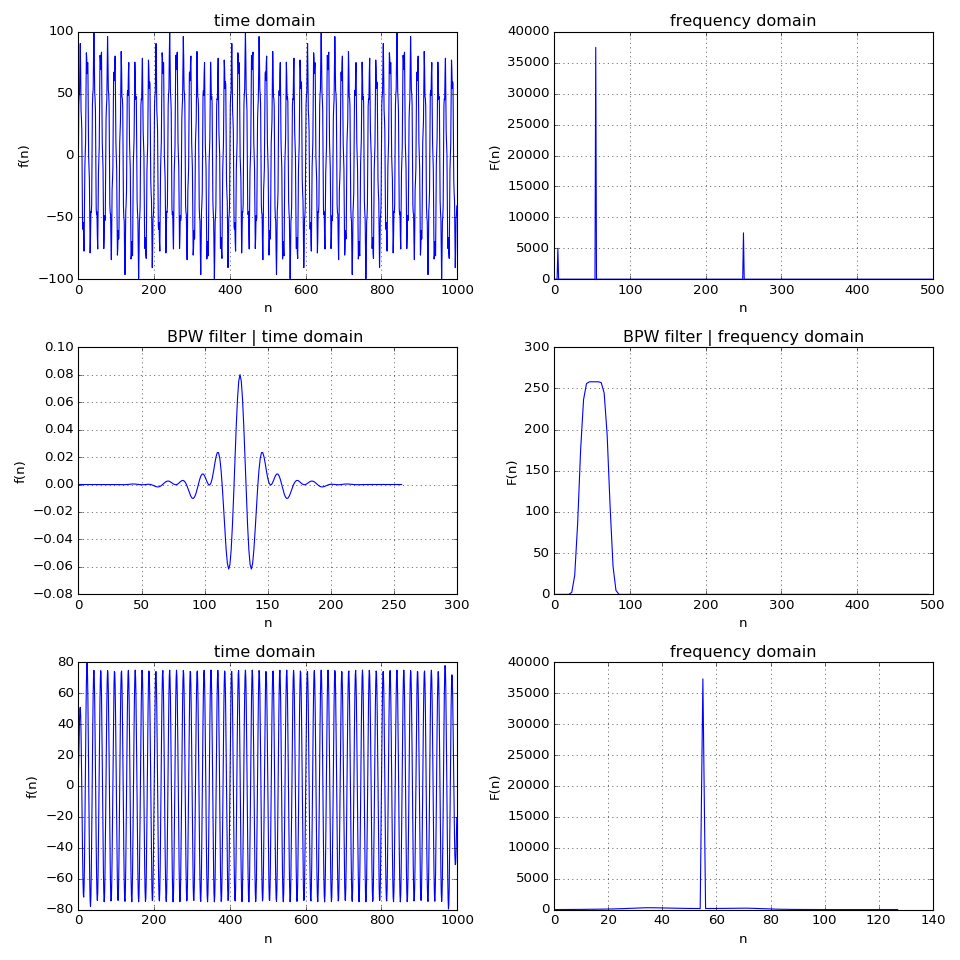

In [7]:
fc1=33
fc2=73
bpw=bpf(fc1,fc2,m,dt)
_,Cn_bpw=fourierTransform(bpw)
Cn_bpw=Cn_bpw[:NF/2]*(NF+1)

yn_bpw=convolution(xn,bpw)[m:-m]
_,Yn_bpw=fourierTransform(yn_bpw)
Yn_bpw=Yn_bpw[:NF/2]
plotHelper(xn,Xn,bpw,Cn_bpw,yn_bpw,Yn_bpw,dt,"BPW filter")

<IPython.core.display.Javascript object>


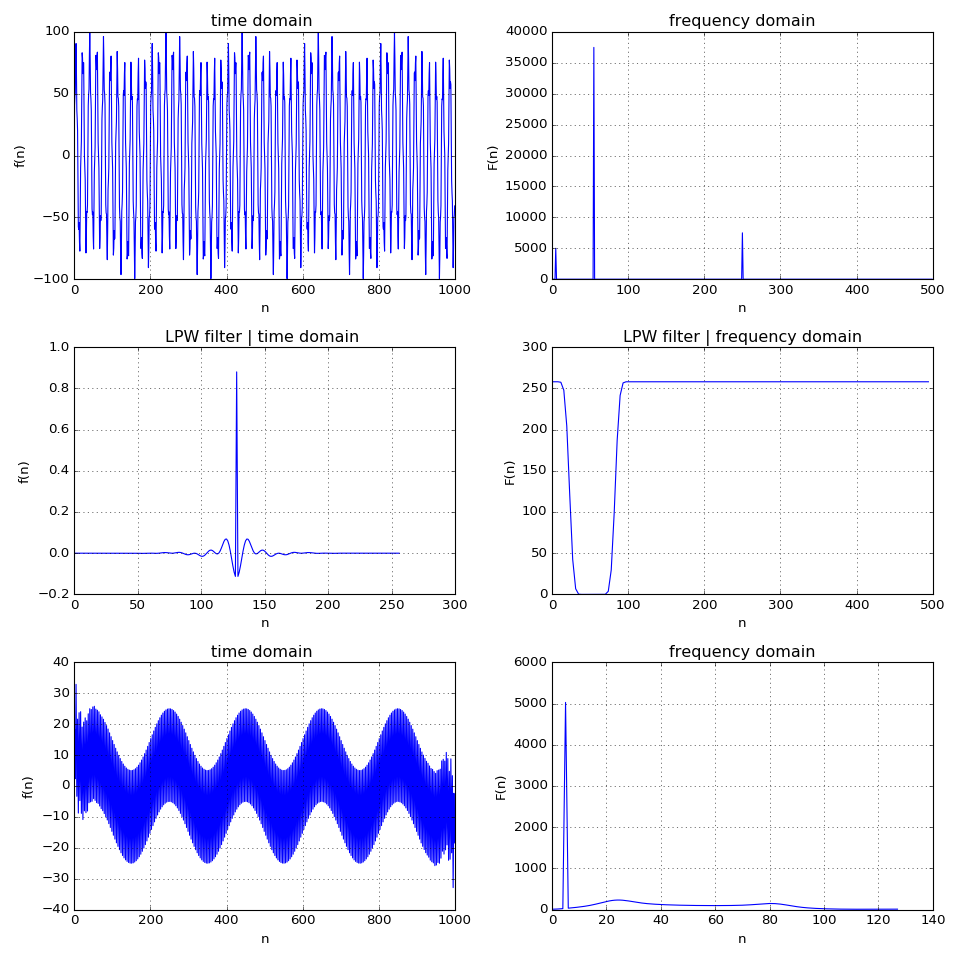

In [8]:
fc1=23
fc2=83
bsw=bsf(fc1,fc2,m,dt)
_,Cn_bsw=fourierTransform(bsw)
Cn_bsw=Cn_bsw[:NF/2]*(NF+1)

yn_bsw=convolution(xn,bsw)[m:-m]
_,Yn_bsw=fourierTransform(yn_bsw)
Yn_bsw=Yn_bsw[:NF/2]
plotHelper(xn,Xn,bsw,Cn_bsw,yn_bsw,Yn_bsw,dt,"LPW filter")